# **Machine Learning Across Breast Cancer Cell Lines**
*Katia Russo, Enrico Adamo, Matteo Colantoni, Sofia Lambro, Andrea Porta*

## - Introduction : background / aim / objective 


## - Material and Methods : 

## **Step 1** : Dataset Overview – *Understanding the Files*


In [57]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Before diving into data exploration or modeling, it’s critical to understand what data is available, its origin, and how it’s structured.
We are working with two different single-cell RNA sequencing technologies applied to two breast cancer cell lines, *MCF7* and *HCC1806*:
- SmartSeq datasets:
    - Metadata files
    - Unfiltered raw data
    - Filtered and normalised data both for training and testing
- DropSeq datasets:
    - Filtered and normalised data both for training and testing

#### SmartSeq - metadata files:
These files provide information about the cells that have been analyzed with the SmartSeq technology, such as their position or their condition (normoxia/hypoxia). The rows are the files representing each single cell, while the columns are the features.

In [3]:
# Load the metadata files
mcf_meta = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for MCF7
print("MCF7 Metadata")
print("Shape:", mcf_meta.shape)
print("First 5 rows:")
mcf_meta.head(5)

MCF7 Metadata
Shape: (383, 8)
First 5 rows:


,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [4]:
# Load the metadata files
hcc_meta = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for HCC1806
print("\nHCC1806 Metadata")
print("Shape:", hcc_meta.shape)
print("First 5 rows:")
hcc_meta.head(5)


HCC1806 Metadata
Shape: (243, 8)
First 5 rows:


,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Now we download the actual sequencing data. Understanding the shape and the content of the data will give us insights on the structure of the datasets we are going to use.

#### SmartSeq - MCF7:

In [5]:
# Load the filtered dataset with the SmartSeq technology
dfs_mcf_unfiltered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_filtered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_train = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_test = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for MCF7
print("MCF7 Unfiltered")
print("Dataframe dimension:", dfs_mcf_unfiltered.shape)
print("First column: ", dfs_mcf_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Filtered")
print("Dataframe dimension:", dfs_mcf_filtered.shape)
print("First column: ", dfs_mcf_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Training Dataset")
print("Dataframe dimension:", dfs_mcf_train.shape)
print("First column: ", dfs_mcf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfs_mcf_test.shape)
print("First column:", dfs_mcf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Unfiltered
Dataframe dimension: (22934, 383)
First column:  WASH7P       0
MIR6859-1    0
WASH9P       1
OR4F29       0
MTND1P23     0
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 20.10 MB

MCF7 Filtered
Dataframe dimension: (18945, 313)
First column:  WASH7P       0
MIR6859-1    0
WASH9P       1
OR4F29       0
MTND1P23     0
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 14.46 MB

MCF7 Training Dataset
Dataframe dimension: (3000, 250)
First column:  CYP1B1        343
CYP1B1-AS1    140
CYP1A1          0
NDRG1           0
DDIT4         386
Name: output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 1.82 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 63)
First column: CYP1B1         492
CYP1B1-AS1     253
CYP1A1           0
NDRG1         1157
DDIT4         6805
Name: 1, dtype: int64
File dimension: 0.47 MB


#### SmartSeq - HCC1806

In [6]:
# Load the filtered dataset with the SmartSeq technology
dfs_hcc_unfiltered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_filtered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_train = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_test = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for HCC1806
print("HCC1806 Unfiltered")
print("Dataframe dimension:", dfs_hcc_unfiltered.shape)
print("First column: ", dfs_hcc_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Filtered")
print("Dataframe dimension:", dfs_hcc_filtered.shape)
print("First column: ", dfs_hcc_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfs_hcc_train.shape)
print("First column: ", dfs_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfs_hcc_test.shape)
print("First column: ", dfs_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

HCC1806 Unfiltered
Dataframe dimension: (23396, 243)
First column:  WASH7P      0
CICP27      0
DDX11L17    0
WASH9P      0
OR4F29      2
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 13.89 MB

HCC1806 Filtered
Dataframe dimension: (19503, 227)
First column:  CICP27        0
DDX11L17      0
WASH9P        0
OR4F29        2
MTND1P23    250
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 11.39 MB

HCC1806 Training Dataset
Dataframe dimension: (3000, 182)
First column:  DDIT4        0
ANGPTL4     48
CALML5       0
KRT14      321
CCNB1      298
Name: output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 1.31 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 45)
First column:  DDIT4        0
ANGPTL4      0
CALML5       0
KRT14      169
CCNB1      233
Name: 1, dtype: int64
File dimension: 0.34 MB


We checked content and dimension of all the datasets we had for the SmartSeq technology. We can notice that we have the cells on the columns, while the rows are the genes, in this way the datasets give us information on the gene expression profiles in the cells. Moreover, the number of columns of the unfiltered data matches the number of rows of the metadatas, so we have information on the condition of each cell.

#### DropSeq - MCF7:

In [7]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_mtf_train = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfd_mtf_test = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for MCF7
print("MCF7 Training Dataset")
print("Dataframe dimension:", dfd_mtf_train.shape)
print("First column: ", dfd_mtf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfd_mtf_test.shape)
print("First column: ", dfd_mtf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Training Dataset
Dataframe dimension: (3000, 14682)
First column:  H1-5       2
MALAT1     3
MT-RNR2    0
ARVCF      0
BCYRN1     0
Name: AAAAAACCCGGC_Normoxia, dtype: int64
File dimension: 84.37 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 3671)
First column:  H1-5       0
MALAT1     3
MT-RNR2    1
ARVCF      0
BCYRN1     2
Name: 1, dtype: int64
File dimension: 21.06 MB


#### DropSeq - HCC1806

In [8]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_hcc_train = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfd_hcc_test = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))


# Inspect the shape and structure for HCC1806
print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfd_hcc_train.shape)
print("First column: ", dfd_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfd_hcc_test.shape)
print("First column: ", dfd_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")


HCC1806 Training Dataset
Dataframe dimension: (3000, 21626)
First column:  MALAT1     1
MT-RNR2    0
NEAT1      0
H1-5       0
TFF1       4
Name: AAAAACCTATCG_Normoxia, dtype: int64
File dimension: 124.26 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 5406)
First column:  MALAT1     0
MT-RNR2    0
NEAT1      0
H1-5       0
TFF1       3
Name: 1, dtype: int64
File dimension: 31.00 MB


At first sight we can immediately notice the difference in dimension between SmartSeq and DropSeq datasets, given by how each technology works.

For both technologies we have the training and testing datasets where have been retained exactly 3000 genes, probably the most variable ones. We are going to use them for training and testing our model.

The absence of metadata files for the DropSeq experiment make us think that we need two different approach when analyzing the different techniques, probably requiring unsupervised learning for the latter.

---

## **Step 2** : Exploratory Data Analysis

We now will go deeper in the analysis of the row data, exploring both cell lines independently.

### **MCF7 Cell Line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [9]:
dfs_mcf_unfiltered.isnull().values.any()

False

#### - *Check Data Type*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [10]:
dfs_mcf_unfiltered.dtypes

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      int64
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      int64
                                                            ...  
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    int64
Length: 383, dtype: object

In [11]:
(dfs_mcf_unfiltered.dtypes=="int64").all()

True

This ensures that all the entries are integers.

### **2.2** Descriptive Statistic

#### **2.2.1** Per Cell

In [12]:
cell_stats_mcf = pd.DataFrame({
    'Mean': dfs_mcf_unfiltered.mean(),
    'Median': dfs_mcf_unfiltered.median(),
    'Std': dfs_mcf_unfiltered.std(),
    'Min': dfs_mcf_unfiltered.min(),
    'Max': dfs_mcf_unfiltered.max(),
    'Q1': dfs_mcf_unfiltered.quantile(0.25),
    'Q3': dfs_mcf_unfiltered.quantile(0.75),
})

print("Per-cell statistics:")
cell_stats_mcf.head()

Per-cell statistics:


,Mean,Median,Std,Min,Max,Q1,Q3
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,40.817651,0.0,465.709940,0,46744,0.0,17.0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0.012253,0.0,0.207726,0,14,0.0,0.0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,86.442400,0.0,1036.572689,0,82047,0.0,5.0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,1.024636,0.0,6.097362,0,289,0.0,0.0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,14.531351,0.0,123.800530,0,10582,0.0,7.0


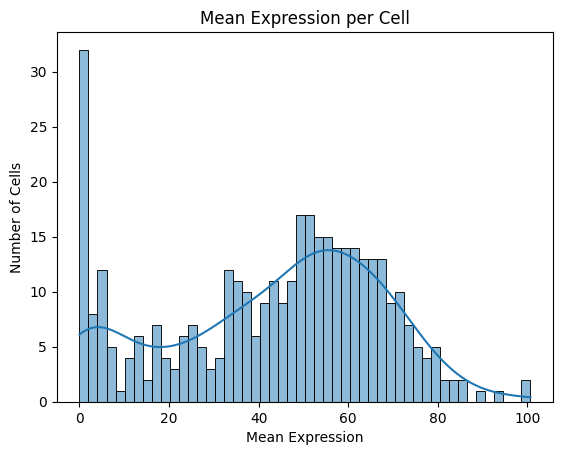

In [13]:
sns.histplot(cell_stats_mcf["Mean"], bins=50, kde=True)
plt.title("Mean Expression per Cell")
plt.xlabel("Mean Expression")
plt.ylabel("Number of Cells")
plt.show()

C:\Users\ilafa\AppData\Local\Temp\ipykernel_11380\1729494827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfs_mcf_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")


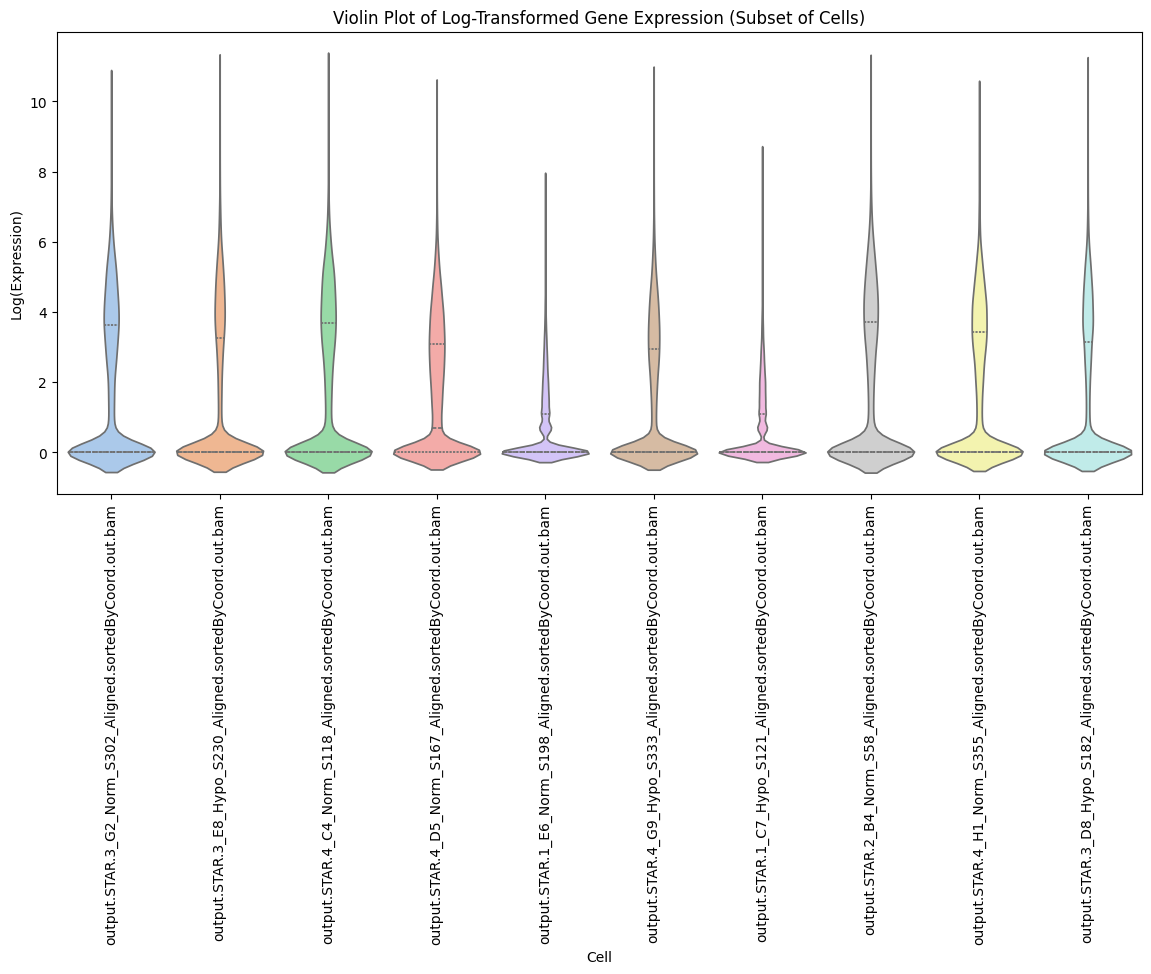

In [14]:
np.random.seed(42)  # per riproducibilità
subset_cells_mcf = np.random.choice(dfs_mcf_unfiltered.columns, size=10, replace=False)
dfs_mcf_subset = dfs_mcf_unfiltered[subset_cells_mcf]

# Log-transform: log(1 + x)
dfs_mcf_log = np.log1p(dfs_mcf_subset)

# Conversione in formato long per Seaborn
dfs_mcf_melted = dfs_mcf_log.melt(var_name="Cell", value_name="Log(Expression)")

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=dfs_mcf_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")
plt.xticks(rotation=90)
plt.title("Violin Plot of Log-Transformed Gene Expression (Subset of Cells)")
plt.show()

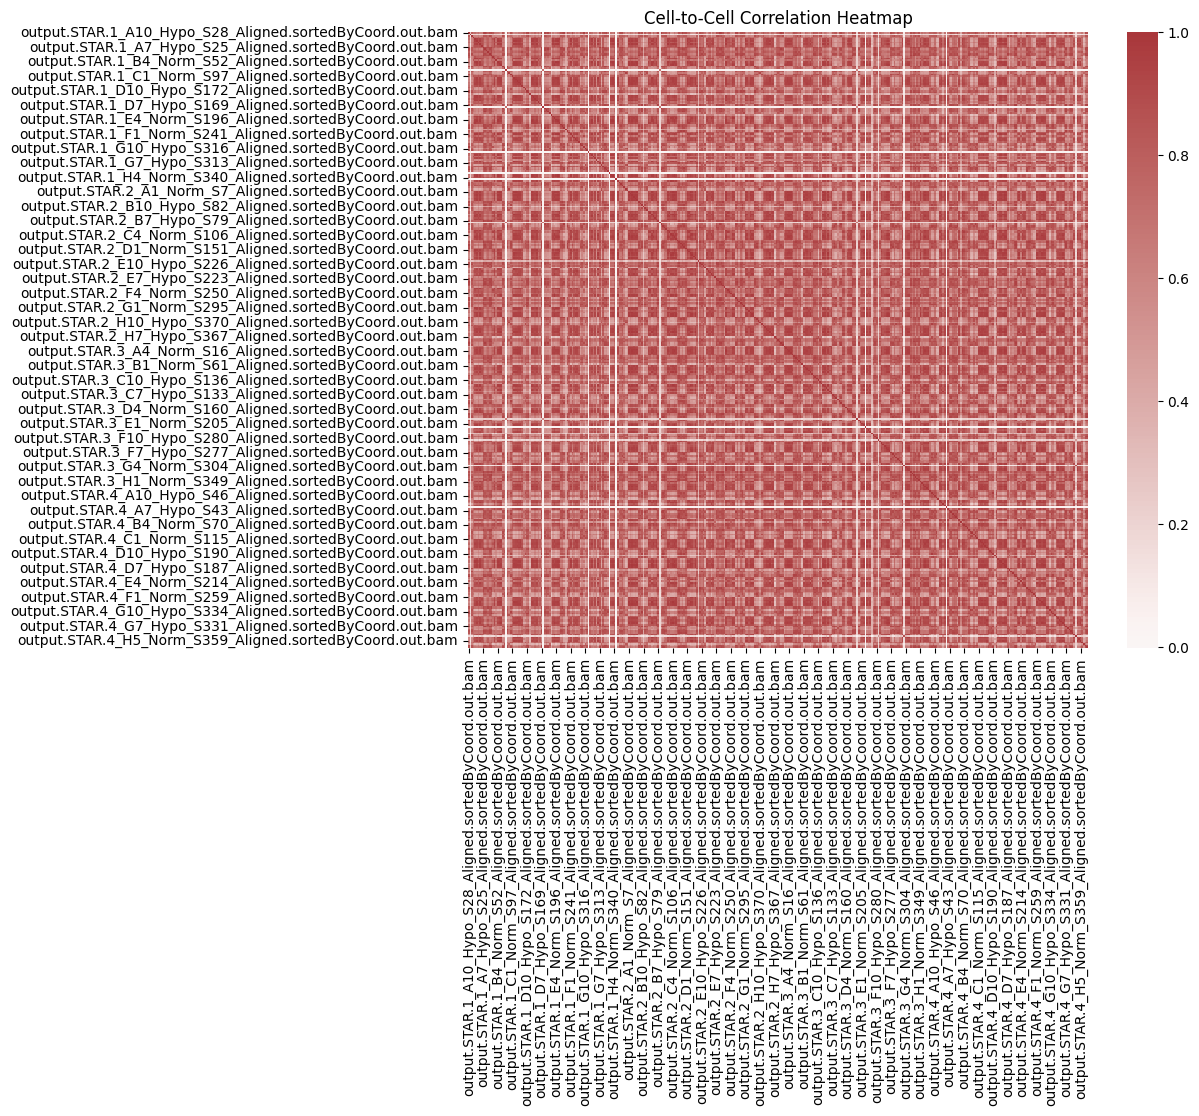

In [15]:
# Compute correlation between cells (columns)
cell_corr_mcf = dfs_mcf_unfiltered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cell_corr_mcf, cmap="vlag", center=0)
plt.title("Cell-to-Cell Correlation Heatmap")
plt.show()

#### **2.2.2** Per Gene

In [16]:
# Calculate per-gene statistics (assuming rows = genes, columns = cells)
gene_stats_mcf = pd.DataFrame(index=dfs_mcf_unfiltered.index)
gene_stats_mcf['Mean'] = dfs_mcf_unfiltered.mean(axis=1)
gene_stats_mcf['Std'] = dfs_mcf_unfiltered.std(axis=1)
gene_stats_mcf['% Expressing'] = (dfs_mcf_unfiltered > 0).mean(axis=1) * 100

# Display the results
print("Per-gene statistic:")
gene_stats_mcf.head()

Per-gene statistic:


,Mean,Std,% Expressing
WASH7P,0.133159,0.618664,8.355091
MIR6859-1,0.026110,0.249286,1.566580
WASH9P,1.344648,2.244543,48.563969
OR4F29,0.054830,0.314770,3.655352
MTND1P23,0.049608,0.229143,4.699739


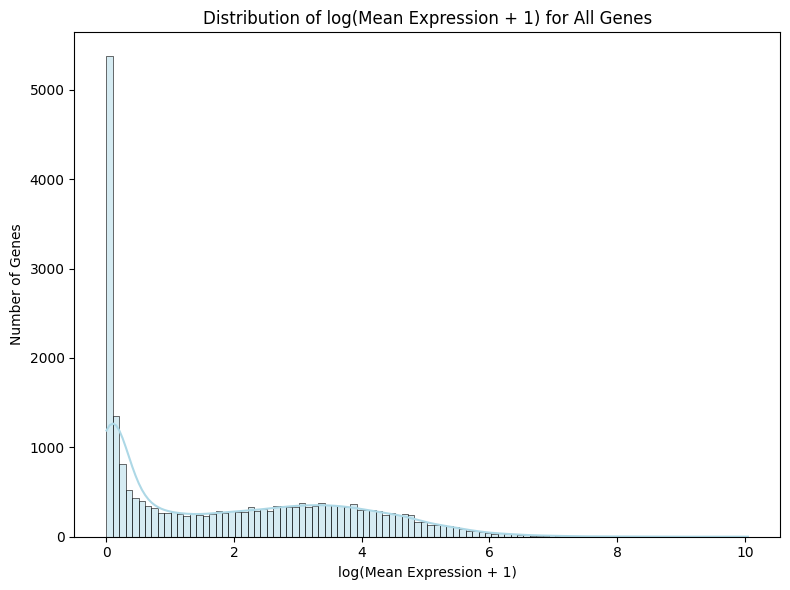

In [17]:
# Create a new column for log(Mean + 1)
gene_stats_mcf['logMean'] = np.log1p(gene_stats_mcf['Mean'])  # log1p(x) = log(x+1)

plt.figure(figsize=(8, 6))
sns.histplot(
    gene_stats_mcf['logMean'],
    bins=100,
    kde=True,
    color='lightblue'
)
plt.xlabel("log(Mean Expression + 1)")
plt.ylabel("Number of Genes")
plt.title("Distribution of log(Mean Expression + 1) for All Genes")
plt.tight_layout()
plt.show()

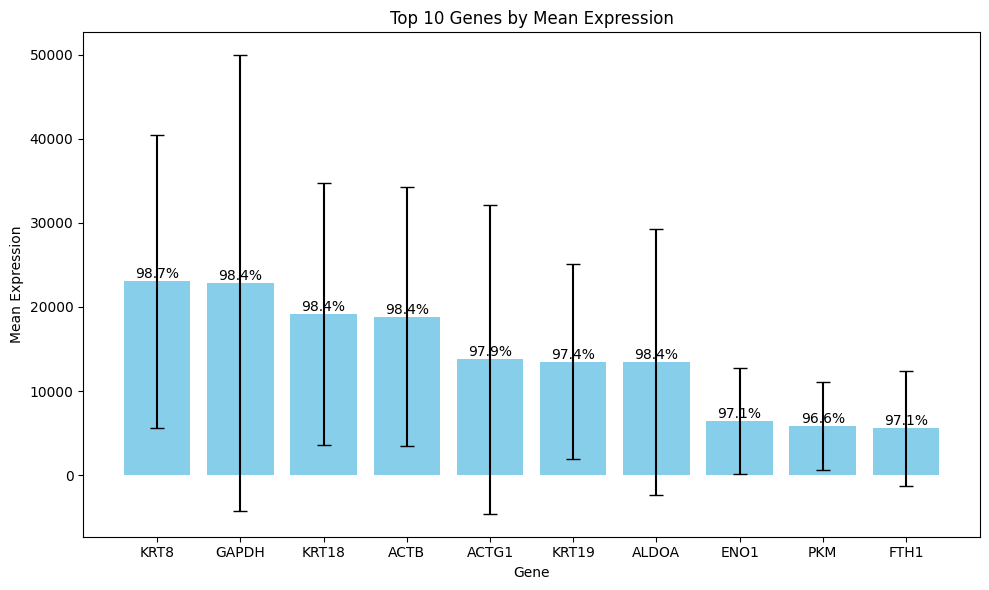

In [18]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

top10_genes_mcf = gene_stats_mcf.sort_values(by='Mean', ascending=False).head(10)

# Create a bar plot for the top 10 genes with error bars (SD)
bars = ax.bar(top10_genes_mcf.index, top10_genes_mcf['Mean'], yerr=top10_genes_mcf['Std'], capsize=5, color='skyblue')

ax.set_ylabel("Mean Expression")
ax.set_xlabel("Gene")
ax.set_title("Top 10 Genes by Mean Expression")

# Annotate each bar with the percentage of cells expressing the gene
for bar, pct in zip(bars, top10_genes_mcf["% Expressing"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\ilafa\AppData\Local\Temp\ipykernel_11380\4290512016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')


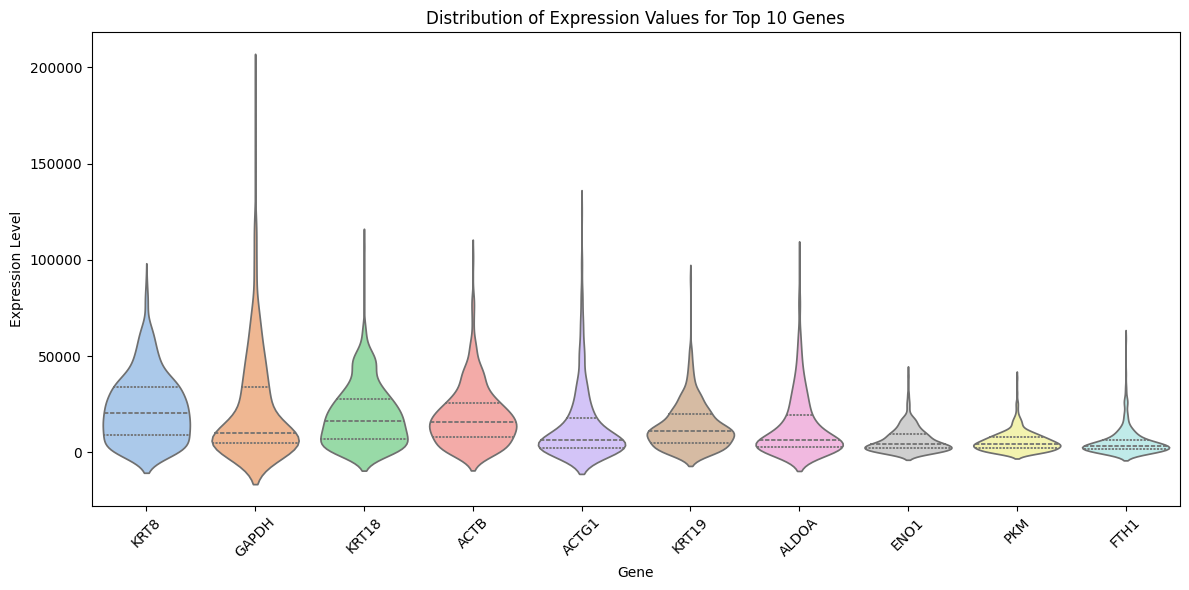

In [19]:
# Subset original data for only the top 10 genes
df_top10 = dfs_mcf_unfiltered.loc[top10_genes_mcf.index]

# Melt the DataFrame so that you have a long-form DataFrame for seaborn
df_melted = df_top10.reset_index().melt(id_vars='index', var_name='Cell', value_name='Expression')
df_melted.rename(columns={'index': 'Gene'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')
plt.title("Distribution of Expression Values for Top 10 Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

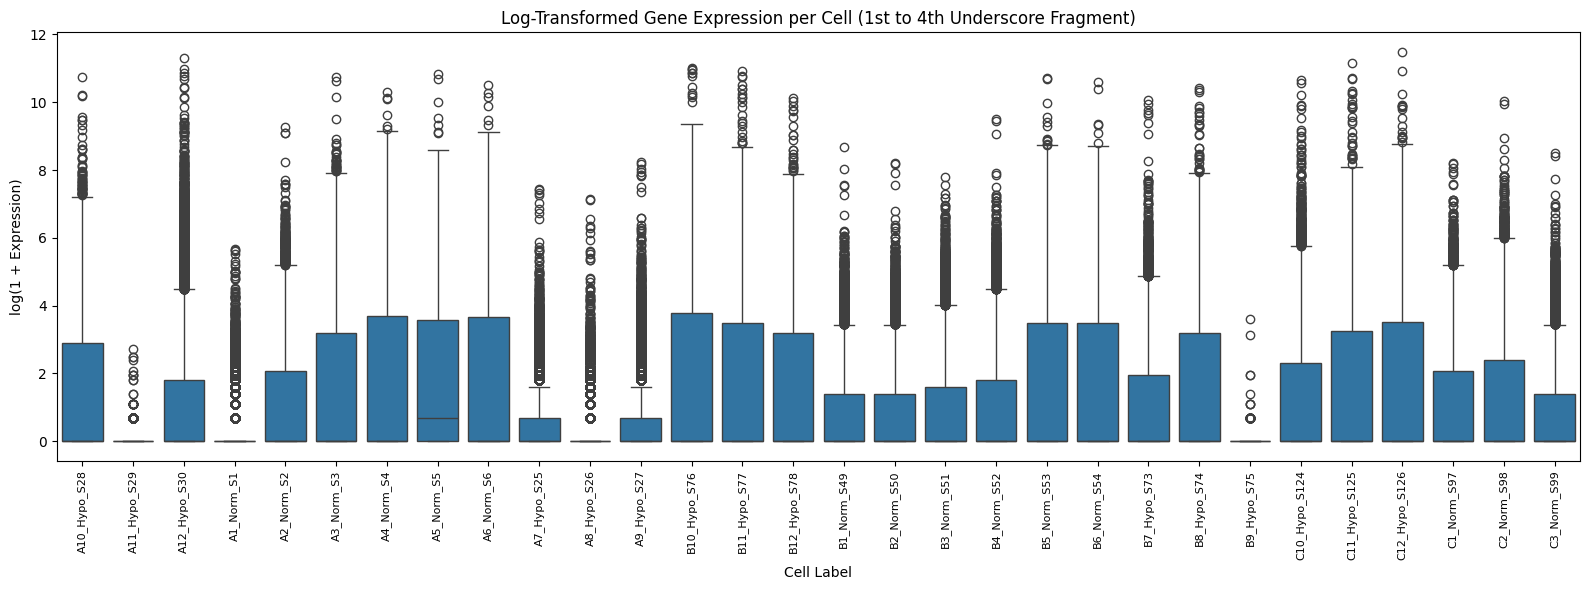

In [20]:
# Select 30 cells
sampled_cells = dfs_mcf_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:4])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_mcf_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the log-transformed gene expression values (log(1 + Expression)) across individual cells, grouped by cell label (extracted from the first to fourth underscore fragments). Although the median expression levels remain consistently low across groups, the distribution tails—represented by upper outliers—capture biologically relevant variability. These high-expression values likely reflect meaningful transcriptional activity in specific cell subpopulations. Removing such outliers would obscure this variability and potentially eliminate informative patterns critical for downstream analysis. Therefore, retaining them is essential to preserve the full complexity of the dataset.

### **2.3** Sparsity

In single-cell RNA-seq data, sparsity refers to the high proportion of zero values in the gene expression matrix. This sparsity arises due to both **biological reasons** (e.g., genes not expressed in certain cells) and **technical limitations** (e.g., dropout events during sequencing).

It is crucial to quantify and understand sparsity before performing any filtering or transformation, as naive methods (e.g., standard outlier removal) may eliminate informative, biologically meaningful values. For example, a gene expressed in only a few cells might represent a cell-type-specific marker or a response to hypoxic stress.

#### **2.3.1** Global Sparsity


In [21]:
n_genes, n_cells = dfs_mcf_unfiltered.shape
total_entries = n_genes * n_cells
total_zeros = (dfs_mcf_unfiltered == 0).sum().sum()
global_sparsity = total_zeros / total_entries
print(f"\n Global sparsity: {global_sparsity:.2%} ({total_zeros:,} / {total_entries:,} zero values)")


 Global sparsity: 60.22% (5,289,146 / 8,783,722 zero values)


#### **2.3.2** Per Cell


In [22]:
# Sparsity per cell (columns): how many zeros per cell
cell_sparsity = (dfs_mcf_unfiltered == 0).sum(axis=0) / n_genes
print(f"\n Cell sparsity — mean: {cell_sparsity.mean():.2%}, std: {cell_sparsity.std():.2%}")
print(f"   Min: {cell_sparsity.min():.2%}, Max: {cell_sparsity.max():.2%}")


 Cell sparsity — mean: 60.22%, std: 11.74%
   Min: 45.41%, Max: 100.00%


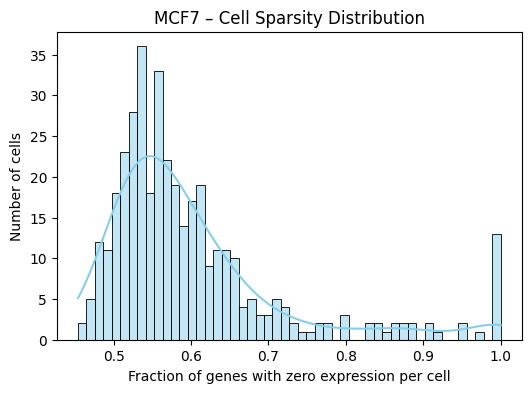

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(cell_sparsity, bins=50, kde=True, color="skyblue")
plt.title("MCF7 – Cell Sparsity Distribution")
plt.xlabel("Fraction of genes with zero expression per cell")
plt.ylabel("Number of cells")
plt.show()

#### **2.3.3** Per Gene


In [24]:
gene_sparsity = (dfs_mcf_unfiltered == 0).sum(axis=1) / n_cells
print(f"\n🔹 Gene sparsity — mean: {gene_sparsity.mean():.2%}, std: {gene_sparsity.std():.2%}")
print(f"   Min: {gene_sparsity.min():.2%}, Max: {gene_sparsity.max():.2%}")


🔹 Gene sparsity — mean: 60.22%, std: 35.55%
   Min: 1.31%, Max: 99.48%


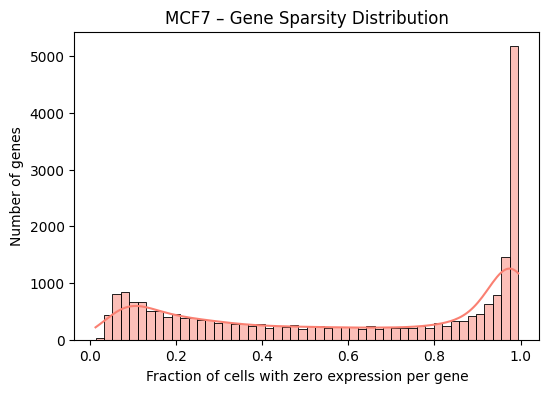

In [25]:
# Histogram: Gene sparsity
plt.figure(figsize=(6, 4))
sns.histplot(gene_sparsity, bins=50, kde=True, color="salmon")
plt.title("MCF7 – Gene Sparsity Distribution")
plt.xlabel("Fraction of cells with zero expression per gene")
plt.ylabel("Number of genes")
plt.show()

#### 🧠 Interpretation of Sparsity

- The **global sparsity** of the MCF7 dataset is approximately **60%**, which is expected for Smart-seq single-cell data and suggests that dropout is present but not extreme.
- **Cell-level sparsity** ranges from 45% to 100%:
  - Most cells express a decent number of genes (40–60% non-zero entries).
  - A few cells have sparsity >90% or even 100%, which may indicate **low-quality cells or technical failure**.
- **Gene-level sparsity** displays a **bimodal distribution**:
  - A subset of genes are expressed in nearly all cells (likely core/housekeeping genes).
  - A large group of genes are expressed in only a few cells — some of these may be **biologically relevant** (e.g., markers), but many are likely **uninformative or noisy**.

> We therefore conclude that sparsity is not a problem **per se**, but should guide our filtering decisions.  
Outliers in this context may represent real biological variability (e.g., rare gene activation) and must not be removed blindly. Instead, we will filter based on **coverage-based thresholds** in the next section.

### **2.4** Outlier Analysis
In classical data analysis, outliers — data points significantly different from the rest — are often removed to reduce noise or prevent distortion of statistical models.

However, in single-cell RNA-seq, **outliers may correspond to true biological signals**:
- A cell with exceptionally high expression of a stress-response gene may be undergoing apoptosis.
- A gene expressed in only a few cells might be a key transcription factor or rare marker.

Therefore, we need to **analyze outliers carefully**, especially at the **cell level**, where:
- Extremely low gene counts or total expression can indicate **low-quality cells**.
- Extremely high total counts might suggest **doublets** (two or more cells sequenced together).


In [26]:
# Total expression per cell (library size)
total_counts = dfs_mcf_unfiltered.sum(axis=0)
n_expressed_genes = (dfs_mcf_unfiltered > 0).sum(axis=0)

# Compute IQR-based thresholds
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Thresholds
libsize_low, libsize_high = get_iqr_bounds(total_counts)
nexpr_low, nexpr_high = get_iqr_bounds(n_expressed_genes)

print(f"🔹 Total counts IQR: lower={libsize_low:.2f}, upper={libsize_high:.2f}")
print(f"🔹 Expressed genes IQR: lower={nexpr_low:.0f}, upper={nexpr_high:.0f}")

# Flagging outlier cells
low_libsize_cells = total_counts[total_counts < libsize_low]
high_libsize_cells = total_counts[total_counts > libsize_high]
low_gene_cells = n_expressed_genes[n_expressed_genes < nexpr_low]

print(f"\n⚠️ Cells with low total expression: {len(low_libsize_cells)}")
print(f"⚠️ Cells with high total expression (possible doublets): {len(high_libsize_cells)}")
print(f"⚠️ Cells with very few expressed genes: {len(low_gene_cells)}")

🔹 Total counts IQR: lower=-616081.50, upper=2623470.50
🔹 Expressed genes IQR: lower=4958, upper=14288

⚠️ Cells with low total expression: 0
⚠️ Cells with high total expression (possible doublets): 0
⚠️ Cells with very few expressed genes: 33


#### 🧠 Interpretation

Using the interquartile range (IQR) method on per-cell metrics:

- **Total expression (library size)** had no flagged outliers. The lower bound was negative, which confirms that no cells had abnormally low expression, and no cells exceeded the upper bound. This suggests that the dataset likely does not contain doublets or failed sequencing artifacts based on total counts.
  
- **Number of expressed genes per cell** identified 33 cells below the IQR lower bound of 4,958. These cells expressed relatively few genes, which may indicate:
  - Low RNA content (e.g., quiescent or apoptotic cells)
  - Technical noise or dropout

> These cells are **flagged as potentially low-quality**, but no immediate removal is applied.  
Instead, this analysis will inform our **filtering criteria** in Section 2.4, where we explicitly define minimum gene detection thresholds for cell inclusion.

### **2.5** Filtering Strategy and Dataset Update
After characterizing sparsity and diagnosing outlier cells, we now define and apply a set of filtering rules to clean the dataset. These rules are based on biological and statistical reasoning, and are not arbitrary or heuristic-only.

#### Goals of filtering:
- Remove genes that are not informative (e.g., barely expressed across cells)
- Remove low-quality cells with too few expressed genes

We follow a two-part strategy:
1. **QC-based diagnostic thresholds** — exploratory histograms and metrics to understand data variability
2. **Final filtering logic** — using biologically and statistically motivated percentage-based thresholds

This strategy avoids overly aggressive or arbitrary cutoffs and maintains reproducibility, as emphasized in the project instructions.

#### **2.5.1** Exploratory QC Metrics

In [27]:
# Transpose to get cells as rows
df_t = dfs_mcf_unfiltered.T

# Compute QC metrics per cell (diagnostic only)
cell_qc = pd.DataFrame({
    "total_counts": df_t.sum(axis=1),
    "n_genes_by_counts": (df_t > 0).sum(axis=1),
    "pct_zero_genes": (df_t == 0).sum(axis=1) / dfs_mcf_unfiltered.shape[0] * 100
})

# Show stats
display(cell_qc.describe())

,total_counts,n_genes_by_counts,pct_zero_genes
count,3.830000e+02,383.000000,383.000000
mean,9.946119e+05,9124.219321,60.215316
std,5.503732e+05,2693.309249,11.743740
min,1.000000e+00,1.000000,45.412924
25%,5.987505e+05,8456.500000,52.956309
50%,1.129334e+06,9907.000000,56.802128
75%,1.408638e+06,10789.000000,63.126799
max,2.308057e+06,12519.000000,99.995640


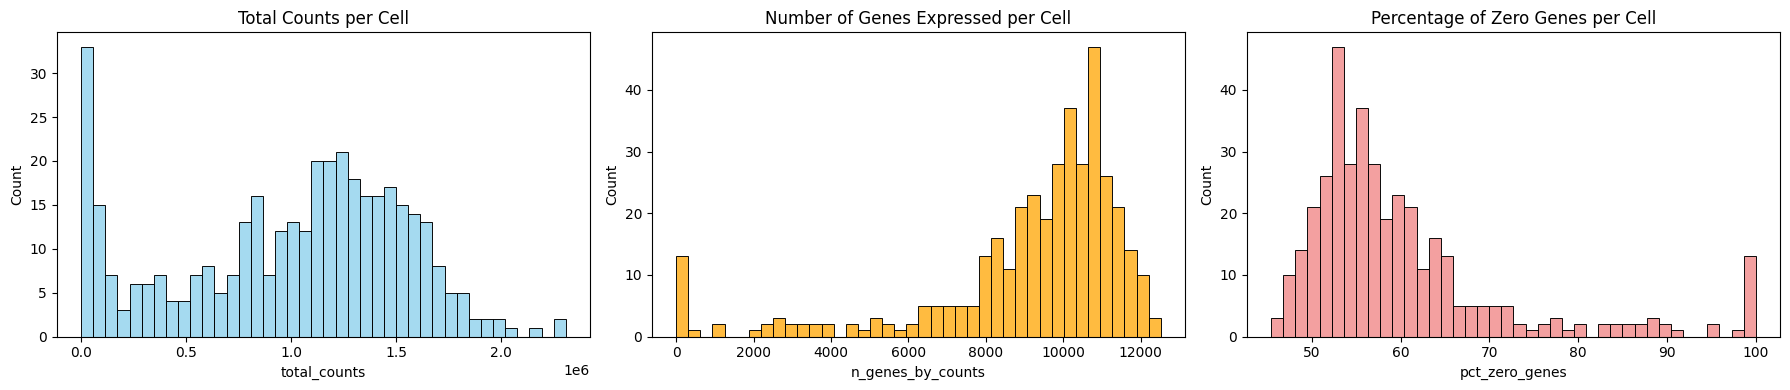

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(cell_qc["total_counts"], bins=40, ax=axs[0], color="skyblue")
axs[0].set_title("Total Counts per Cell")

sns.histplot(cell_qc["n_genes_by_counts"], bins=40, ax=axs[1], color="orange")
axs[1].set_title("Number of Genes Expressed per Cell")

sns.histplot(cell_qc["pct_zero_genes"], bins=40, ax=axs[2], color="lightcoral")
axs[2].set_title("Percentage of Zero Genes per Cell")

plt.tight_layout()
plt.show()

#### 🧠 Interpretation of QC Distributions

- **Total counts per cell** show a broad right-skewed distribution, with most cells between 0.5M and 1.5M counts. A small cluster near zero may correspond to low-quality or empty droplets.
- **Number of expressed genes** peaks around 10,000, with a small number of low-complexity cells. This justifies setting a cutoff around 3,500–4,000 to exclude weak transcriptomes.
- **% of zero genes per cell** centers between 50–60%, which is biologically expected in Smart-seq. A few outlier cells at 100% clearly reflect failed captures.

> These metrics provide insight into cell quality and support our decision to avoid arbitrary hard cutoffs like 200k total counts or 7,000 genes.  
Instead, we proceed with a consistent and explainable filtering logic based on percentage coverage and gene complexity.

#### 🧠 Interpretation (Exploratory Only)

- We examined per-cell total expression (`total_counts`), number of expressed genes, and sparsity.
- Thresholds like `total_counts ≥ 200,000`, `n_genes_by_counts ≥ 7,000`, or `pct_zeros ≤ 70%` might be **reasonable filters**, but without formal derivation or literature backing, they are best used as diagnostics.
- Rather than relying on arbitrary cutoffs, we now proceed with percentage-based filtering grounded in reproducible logic.

#### **2.5.2** Filtering Strategy
We apply two well-justified thresholds:

- **Gene-level:** Keep genes expressed in at least 2% of cells
- **Cell-level:** Keep cells expressing at least 3,500 genes

This approach balances sparsity reduction with biological signal retention and aligns with the target dimensions of the provided filtered dataset (18945 × 313).

In [29]:
# Make a copy to avoid modifying the original
df = dfs_mcf_unfiltered.copy()

# 1. Remove genes not expressed at all
df = df.loc[(df != 0).any(axis=1)]

# 2. Keep genes expressed in ≥2% of cells
min_cells = int(df.shape[1] * 0.02)
gene_filter = (df > 0).sum(axis=1) >= min_cells
df_genefilt = df.loc[gene_filter]
print(f"✅ Genes retained: {df_genefilt.shape[0]}")

# 3. Keep cells expressing ≥3,500 genes
cell_filter = (df_genefilt > 0).sum(axis=0) >= 3500
df_filtered = df_genefilt.loc[:, cell_filter]
print(f"✅ Cells retained: {df_filtered.shape[1]}")
print(f"📦 Final filtered shape: {df_filtered.shape}")

# 4. Sparsity report
total_entries = df_filtered.shape[0] * df_filtered.shape[1]
total_zeros = (df_filtered == 0).sum().sum()
sparsity = total_zeros / total_entries
print(f"📉 Final sparsity: {sparsity:.2%}")

✅ Genes retained: 18714
✅ Cells retained: 356
📦 Final filtered shape: (18714, 356)
📉 Final sparsity: 48.26%


We tested a more restrictive threshold of 7,000 genes per cell, which led to 330 retained cells — closer to the reference (313) but at the cost of excluding potentially valid biological signal. We ultimately selected 3,500 genes as a more conservative but biologically motivated threshold.

In [30]:
# Save to final filtered variable for later use
dfs_mcf_f1 = df_filtered

### **2.6** - Check for Duplicates
To ensure the integrity of the dataset before normalization, we inspect the filtered matrix for duplicate entries.

We focus on two types:
- **Duplicate genes**: rows with the same index (gene identifier)
- **Duplicate cells**: columns with identical expression profiles (rare)

At this stage, we **do not remove duplicates**, but we list them and reflect on whether they require manual resolution.

In [31]:
# Start from your filtered matrix
df = dfs_mcf_f1  # already filtered by sparsity, not final log-transformed

# Check for duplicate gene entries (row index)
duplicate_rows_mcf = df.duplicated(keep=False)
df[duplicate_rows_mcf]

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
UGT1A8,0,57,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
UGT1A9,0,57,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
PANDAR,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
LAP3P2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
SUGT1P4-STRA6LP,0,0,0,0,0,2,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0
STRA6LP,0,0,0,0,0,2,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0
LINC00856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
LINC00595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
CCL3L3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
CCL3L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [32]:
duplicates_grouped_mcf = df.groupby(list(df.columns)).filter(lambda x: len(x) > 1)
# Raggruppa nuovamente per profilo e costruisci le tuple con i nomi dei geni
duplicate_gene_mcf_tuples = [
    tuple(group.index)
    for _, group in duplicates_grouped_mcf.groupby(list(duplicates_grouped_mcf.columns))
]

# Stampa la lista di tuple
print("Duplicate gene tuples:", duplicate_gene_mcf_tuples)

Duplicate gene tuples: [('LINC00856', 'LINC00595'), ('CCL3L3', 'CCL3L1'), ('SUGT1P4-STRA6LP', 'STRA6LP'), ('PANDAR', 'LAP3P2'), ('UGT1A8', 'UGT1A9')]


- These are likely either:
  - Members of gene families (e.g., UGT1A)
  - Pseudogenes or read-through transcripts
  - Different transcript annotations at the same locus

We retain all of them for now, as they may carry **distinct biological signal**. However, we will monitor these during normalization and feature selection (e.g., correlation-based redundancy) and discuss them as potential interpretation caveats.

### **2.4** Normalization

In [59]:
# Log1p Transform
dfs_mcf_log = np.log1p(dfs_mcf_f1)

# Print log-transformed data (before Z-score)
print("MCF7: After Log1p, Before Z-score")
print(dfs_mcf_log.iloc[:10, :10])

# Z-score normalization
dfs_mcf_normalized = pd.DataFrame(
    StandardScaler().fit_transform(dfs_mcf_log.T).T,
    index=dfs_mcf_log.index,
    columns=dfs_mcf_log.columns)

# Print Z-score normalized data
print("MCF7: After Z-score")
print(dfs_mcf_normalized.iloc[:10, :10])



MCF7: After Log1p, Before Z-score
          output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
WASH7P                                             0.000000          
WASH9P                                             0.693147          
OR4F29                                             0.000000          
MTND1P23                                           0.000000          
MTND2P28                                           1.098612          
MTCO1P12                                           1.098612          
MTCO2P12                                           0.000000          
MTATP8P1                                           0.000000          
MTATP6P1                                           3.401197          
MTCO3P12                                           0.000000          

          output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam  \
WASH7P                                             0.000000          
WASH9P                                             0.00

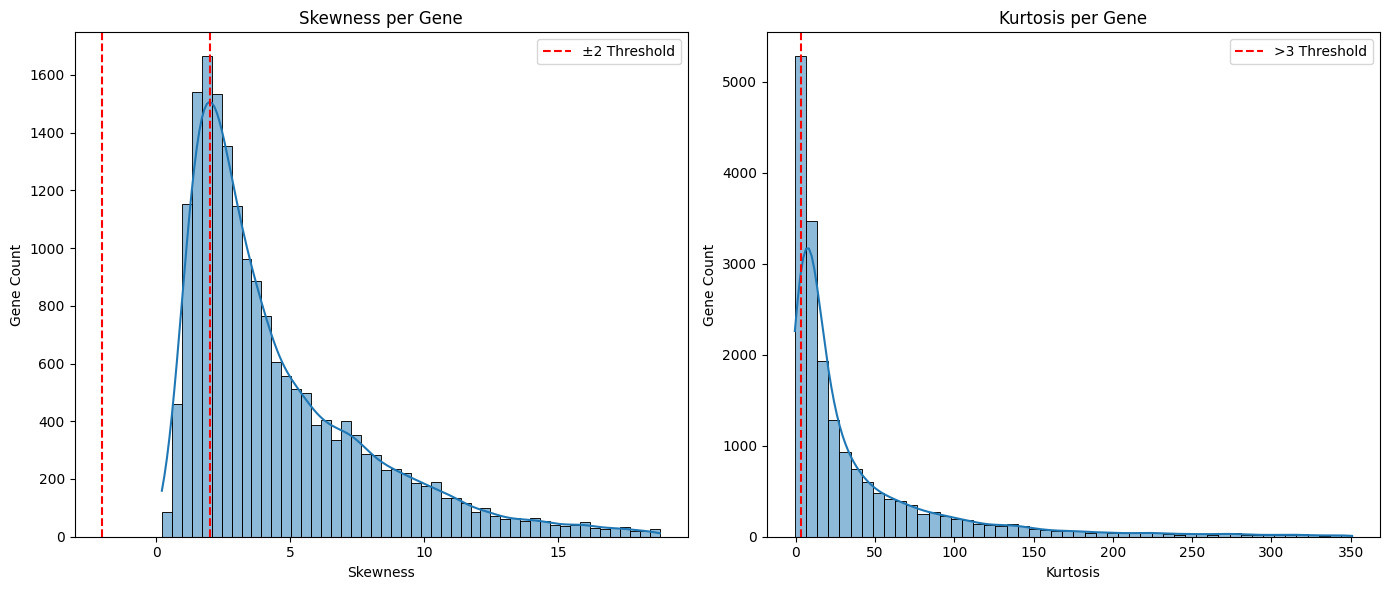

Genes with high skewness (|skew| > 2):
          Skewness    Kurtosis
WASH7P    8.876589  106.429921
WASH9P    3.044490   14.531776
OR4F29    6.524853   46.751541
MTND1P23  4.763693   23.811444
MTCO2P12  2.287135    5.944341
...            ...         ...
MT-TS2    3.505704   14.726326
MT-ND6    2.556955   13.428355
MT-TE     2.276176    7.419499
MT-TT     2.471743    7.909061
MAFIP     3.945965   20.019771

[14142 rows x 2 columns]

Genes with high kurtosis (> 3):
          Skewness    Kurtosis
WASH7P    8.876589  106.429921
WASH9P    3.044490   14.531776
OR4F29    6.524853   46.751541
MTND1P23  4.763693   23.811444
MTCO1P12  1.856511    4.431778
...            ...         ...
MT-ND6    2.556955   13.428355
MT-TE     2.276176    7.419499
MT-TT     2.471743    7.909061
MT-TP     1.857553    3.998614
MAFIP     3.945965   20.019771

[16293 rows x 2 columns]


In [60]:
skewness = dfs_mcf_f1.apply(skew, axis=1)
kurt = dfs_mcf_f1.apply(kurtosis, axis=1)

# Create summary DataFrame
distribution_summary = pd.DataFrame({
    "Skewness": skewness,
    "Kurtosis": kurt
})

# Identify genes with high skewness or kurtosis
high_skew = distribution_summary[abs(distribution_summary["Skewness"]) > 2]
high_kurt = distribution_summary[distribution_summary["Kurtosis"] > 3]

# Plotting
plt.figure(figsize=(14, 6))

# Skewness plot
plt.subplot(1, 2, 1)
sns.histplot(distribution_summary["Skewness"], bins=50, kde=True)
plt.axvline(2, color='red', linestyle='--', label='±2 Threshold')
plt.axvline(-2, color='red', linestyle='--')
plt.title("Skewness per Gene")
plt.xlabel("Skewness")
plt.ylabel("Gene Count")
plt.legend()

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.histplot(distribution_summary["Kurtosis"], bins=50, kde=True)
plt.axvline(3, color='red', linestyle='--', label='>3 Threshold')
plt.title("Kurtosis per Gene")
plt.xlabel("Kurtosis")
plt.ylabel("Gene Count")
plt.legend()

plt.tight_layout()
plt.show()

# Print flagged genes
print("Genes with high skewness (|skew| > 2):")
print(high_skew)

print("\nGenes with high kurtosis (> 3):")
print(high_kurt)

The left plot shows the distribution of skewness per gene. The vast majority of genes exhibit positive skewness, peaking around values slightly above 2 and extending to much higher values. This means that the expression distributions of most genes are asymmetric with a long right tail — in other words, they are characterized by a large number of low expression values and a few rare, high expression spikes. This pattern is typical of sparse single-cell data, where many genes are expressed at low levels in most cells, with occasional bursts of high expression.

The right plot illustrates the kurtosis per gene, which quantifies how much of the distribution's variance is due to outliers. Here, we observe that most genes have kurtosis well above 3, with the distribution sharply skewed toward very high values. This suggests that gene expression profiles tend to have heavy tails, meaning that outliers (either due to biological bursts or technical noise like dropouts) play a significant role in the variance. Very few genes fall below the kurtosis threshold of 3, indicating that flat-tailed, outlier-free distributions are rare in this dataset.

Together, these plots confirm that high skewness and high kurtosis are common across genes, highlighting the presence of asymmetry and extreme values in gene expression typical of single-cell transcriptomic data.

### PCA Implementation
Our plan:
1. **Data Centering**: Subtract the mean from the dataset.

2. **Covariance Matrix Calculation**: Compute the covariance matrix of the centered data.

3. **Eigen-decomposition**: Use np.linalg.eig (or SVD) to compute eigenvalues and eigenvectors.

4. **Sorting Components**: Order the eigenvectors by the magnitude of their eigenvalues.

5. **Projection**: Project the original data onto the principal components.

6. **Reconstruction**: Reconstruct the data from the selected components and compute the reconstruction error (e.g., mean squared error).


In [61]:
def pca(X, num_components, standardize=False):
    # Center the data
    # Notice the axis=0 argument to calculate mean along the columns!
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    X_std = None
    if standardize: # standardize each feature to have unit variance
        X_std = np.std(X_centered, axis=0)
        # Avoid division by zero
        X_std[X_std == 0] = 1.0
        X_centered = X_centered / X_std
    
    # Compute covariance matrix
    # Notice the rowvar=False argument to indicate that
    # the columns represent features, and the rows instances
    # we also need to be sure no complex numbers are generated
    cov_matrix = np.cov(X_centered, rowvar=False, dtype=np.float64)

    # Eigen-decomposition
    # WARNING: we use np.linalg.eigh, 
    # that is specific for Hermitian matrices 
    # (in this case, the covariance matrix is symmetric)
    # this function is more stable and efficient for this case
    # and we avoid complex numbers!
    # It is also much more efficient than np.linalg.eig,
    # it returns the eigenvalues in ascending order 
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    # argsort is not really necessary, 
    # because we are using eigh instead of eig, 
    # but it helps for the visualization
    sorted_idx = np.argsort(eigenvalues)[::-1]

    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx] #The first dimension are the eigenvector themself, the second dimension are the respective eigenvalues
    
    # Select 'num_components' principal components
    components = eigenvectors_sorted[:, :num_components]
    
    # Project the data
    X_projected = np.dot(X_centered, components)
    
    # Reconstruct the data from the projection
    X_reconstructed = np.dot(X_projected, components.T) 

    # Reverse standardization if needed
    if standardize:
        X_reconstructed = X_reconstructed * X_std

    # Add the mean back
    X_reconstructed += X_mean

    # Compute reconstruction error (mean squared error)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    
    return {
        "X_mean": X_mean,
        "X_std": X_std,
        "components": components,
        "X_projected": X_projected,
        "X_reconstructed": X_reconstructed,
        "reconstruction_error": reconstruction_error,
        "eigenvalues": eigenvalues_sorted
    } 

for i in range (1,100,10):
    pca_result = pca(dfs_mcf_f1.to_numpy(), num_components= i, standardize=True)
    print("PCA reconstruction error:", pca_result["reconstruction_error"])

PCA reconstruction error: 106690.42256453844
PCA reconstruction error: 16182.267823589787
PCA reconstruction error: 8419.970622232493
PCA reconstruction error: 6039.919997830751
PCA reconstruction error: 4768.835765687793
PCA reconstruction error: 3926.5882083130114
PCA reconstruction error: 3277.5100847884264
PCA reconstruction error: 2815.157901912432
PCA reconstruction error: 2446.1453798519333
PCA reconstruction error: 2134.011569440999


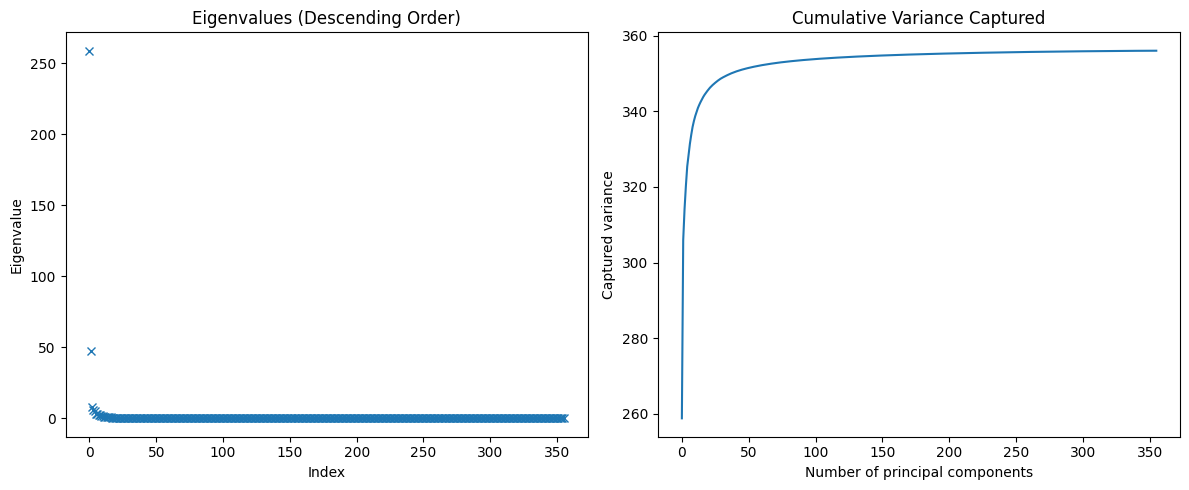

In [63]:
# Use your PCA function once with full decomposition
pca_result_full = pca(dfs_mcf_f1.to_numpy(), num_components=dfs_mcf_f1.shape[1], standardize=True)

# Extract sorted eigenvalues
eigenvalues_sorted = pca_result_full["eigenvalues"]

# (a) Scree plot: eigenvalues in descending order
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eigenvalues_sorted, 'x')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues (Descending Order)")

# (b) Cumulative captured variance
cumulative_variance = np.cumsum(eigenvalues_sorted)
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance)
plt.xlabel("Number of principal components")
plt.ylabel("Captured variance")
plt.title("Cumulative Variance Captured")

plt.tight_layout()
plt.show()

-------

### **HCC1806 Cell line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [35]:
dfs_hcc_unfiltered.isnull().values.any()

False

#### - *Check Data Types*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [36]:
dfs_hcc_unfiltered.dtypes

output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       int64
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        int64
                                                                        ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     int64
Length: 243, dtype: object

In [37]:
(dfs_hcc_unfiltered.dtypes=="int64").all()

True

This ensures that all the entries are integers.

#### - *Check Low Count Rows and Columns*

In [38]:
gene_symbols_hcc = dfs_hcc_unfiltered.index.tolist()
print("Dataframe indexes:", gene_symbols_hcc)

Dataframe indexes: ['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F29', 'MTND1P23', 'MTND2P28', 'MTCO1P12', 'MTCO2P12', 'MTATP8P1', 'MTATP6P1', 'MTCO3P12', 'OR4F16', 'CICP3', 'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'TUBB8P11', 'LINC02593', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN', 'RNF223', 'C1orf159', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'B3GALT6', 'C1QTNF12', 'UBE2J2', 'LINC01786', 'SCNN1D', 'ACAP3', 'MIR6726', 'PUSL1', 'INTS11', 'MIR6727', 'CPTP', 'TAS1R3', 'DVL1', 'MIR6808', 'MXRA8', 'AURKAIP1', 'NDUFB4P8', 'CCNL2', 'MRPL20-AS1', 'MRPL20', 'RN7SL657P', 'MRPL20-DT', 'ANKRD65', 'LINC01770', 'VWA1', 'ATAD3C', 'ATAD3B', 'ATAD3A', 'SSU72', 'FNDC10', 'MIB2', 'CDK11B', 'SLC35E2B', 'MMP23A', 'CDK11A', 'SLC35E2A', 'NADK', 'GNB1', 'TMEM52', 'CFAP74', 'GABRD', 'PRKCZ', 'PRKCZ-AS1', 'FAAP20', 'SKI', 'MORN1', 'RER1', 'PEX10', 'PLCH2', 'PANK4', 'HES5', 'TNFRSF14-AS1', 'TNFRSF14', 'PRXL2B', 'MMEL1', 'PRDM16', 'ARHGEF16', 'MEGF6', 'TPRG1L', 'WRAP73', 'T

#### **2.2.1** Per Cell

In [39]:
cell_stats_hcc = pd.DataFrame({
    'Mean': dfs_hcc_unfiltered.mean(),
    'Median': dfs_hcc_unfiltered.median(),
    'Std': dfs_hcc_unfiltered.std(),
    'Min': dfs_hcc_unfiltered.min(),
    'Max': dfs_hcc_unfiltered.max(),
    'Q1': dfs_hcc_unfiltered.quantile(0.25),
    'Q3': dfs_hcc_unfiltered.quantile(0.75),
    'IQR': dfs_hcc_unfiltered.quantile(0.75) - dfs_hcc_unfiltered.quantile(0.25),
})

print("Per-cell statistics:")
cell_stats_hcc.head()

Per-cell statistics:


,Mean,Median,Std,Min,Max,Q1,Q3,IQR
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,99.565695,0.0,529.532443,0,35477,0.0,51.0,51.0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,207.678278,0.0,981.107905,0,69068,0.0,125.0,125.0
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,9.694734,0.0,65.546050,0,6351,0.0,5.0,5.0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,150.689007,0.0,976.936548,0,70206,0.0,40.0,40.0
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,35.700504,0.0,205.885369,0,17326,0.0,22.0,22.0


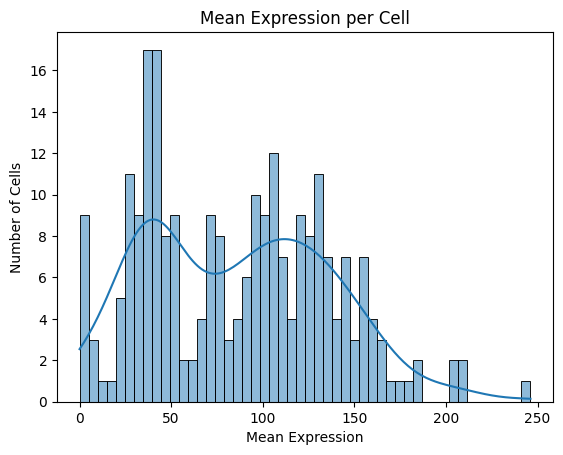

In [40]:
sns.histplot(cell_stats_hcc["Mean"], bins=50, kde=True)
plt.title("Mean Expression per Cell")
plt.xlabel("Mean Expression")
plt.ylabel("Number of Cells")
plt.show()

C:\Users\ilafa\AppData\Local\Temp\ipykernel_11380\879285768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfs_hcc_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")


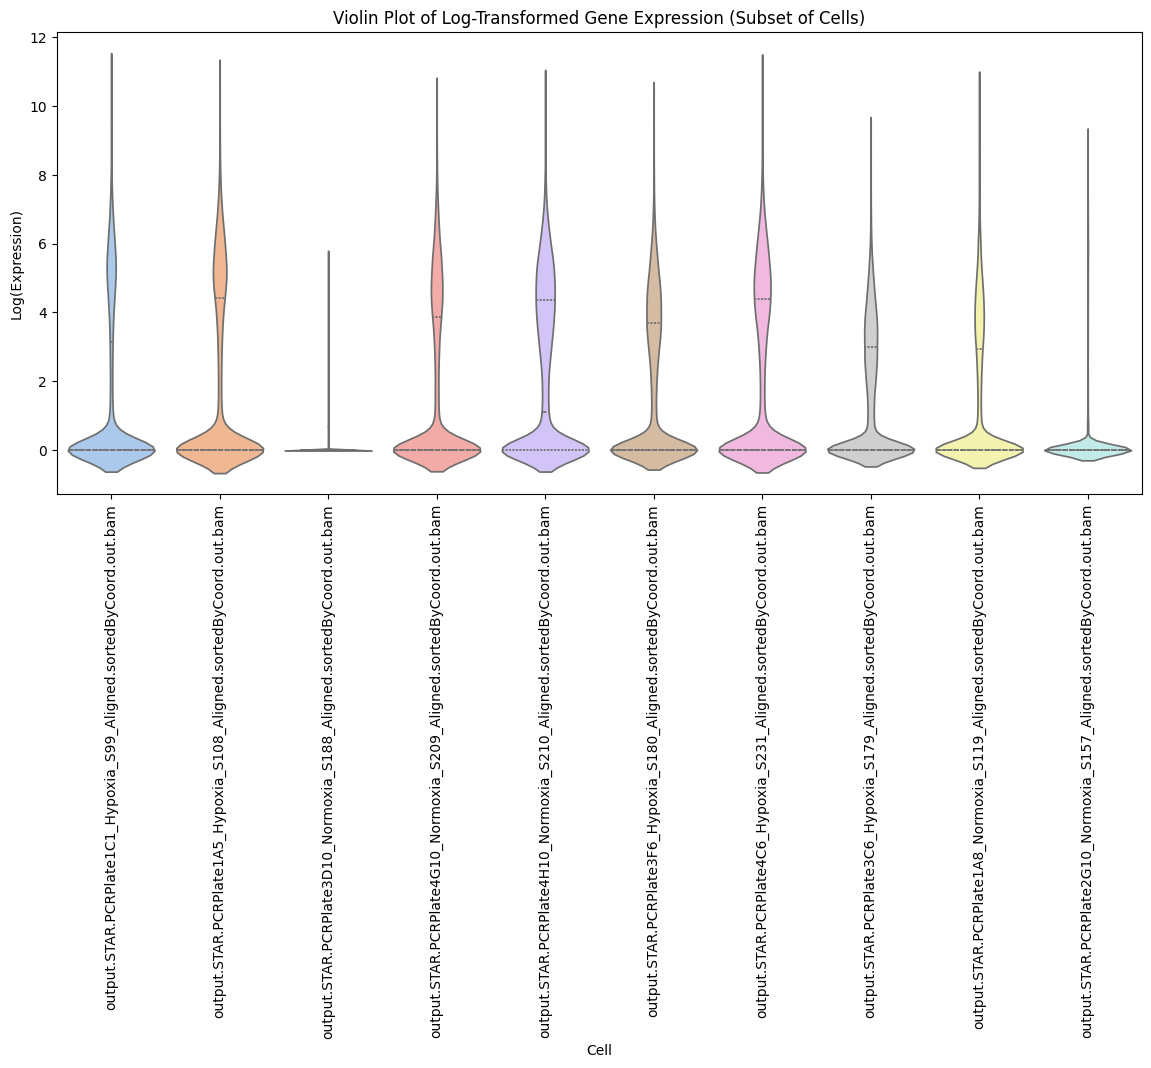

In [41]:
np.random.seed(42)
subset_cells_hcc = np.random.choice(dfs_hcc_unfiltered.columns, size=10, replace=False)
dfs_hcc_subset = dfs_hcc_unfiltered[subset_cells_hcc]

# Log-transform: log(1 + x)
dfs_hcc_log = np.log1p(dfs_hcc_subset)

# Conversione in formato long per Seaborn
dfs_hcc_melted = dfs_hcc_log.melt(var_name="Cell", value_name="Log(Expression)")

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=dfs_hcc_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")
plt.xticks(rotation=90)
plt.title("Violin Plot of Log-Transformed Gene Expression (Subset of Cells)")
plt.show()

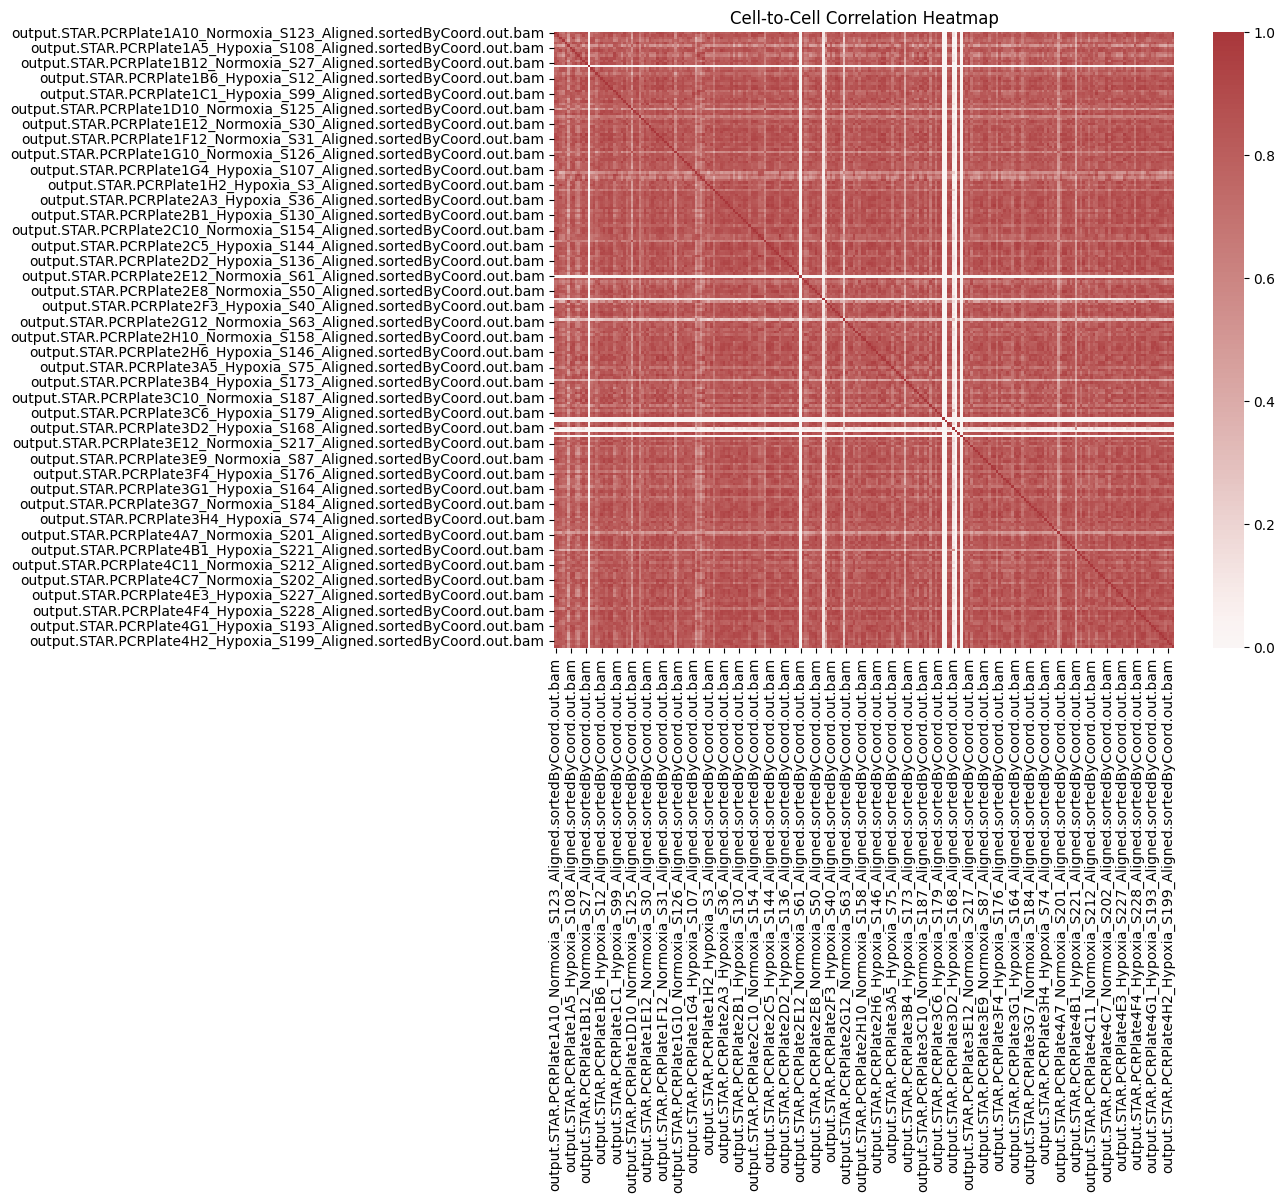

In [42]:
cell_corr_hcc = dfs_hcc_unfiltered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cell_corr_hcc, cmap="vlag", center=0)
plt.title("Cell-to-Cell Correlation Heatmap")
plt.show()

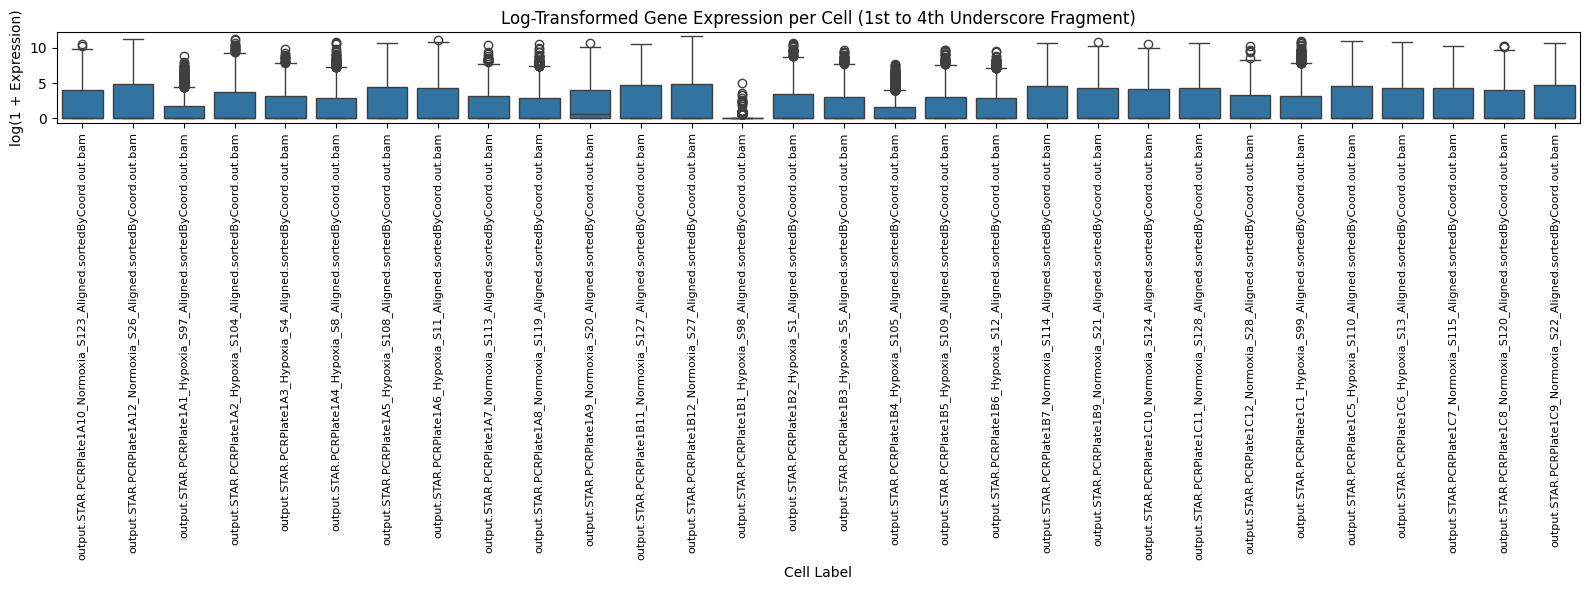

In [43]:
# Select 30 cells
sampled_cells = dfs_hcc_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:3])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_hcc_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the log-transformed gene expression values (log(1 + Expression)) across individual cells, grouped by cell label (extracted from the first to fourth underscore fragments). Although the median expression levels remain consistently low across groups, the distribution tails—represented by upper outliers—capture biologically relevant variability. These high-expression values likely reflect meaningful transcriptional activity in specific cell subpopulations. Removing such outliers would obscure this variability and potentially eliminate informative patterns critical for downstream analysis. Therefore, retaining them is essential to preserve the full complexity of the dataset.

#### **2.2.2** Per Gene

In [44]:
# Calculate per-gene statistics (assuming rows = genes, columns = cells)
gene_stats_hcc = pd.DataFrame(index=dfs_hcc_unfiltered.index)
gene_stats_hcc['Mean'] = dfs_hcc_unfiltered.mean(axis=1)
gene_stats_hcc['Std'] = dfs_hcc_unfiltered.std(axis=1)
gene_stats_hcc['% Expressing'] = (dfs_hcc_unfiltered > 0).mean(axis=1) * 100

# Display the results
print("Per-gene statistic:")
gene_stats_hcc.head()

Per-gene statistic:


,Mean,Std,% Expressing
WASH7P,0.045267,0.318195,2.469136
CICP27,0.119342,0.594531,5.349794
DDX11L17,0.469136,1.455282,17.695473
WASH9P,0.255144,0.818639,13.991770
OR4F29,0.127572,0.440910,9.876543


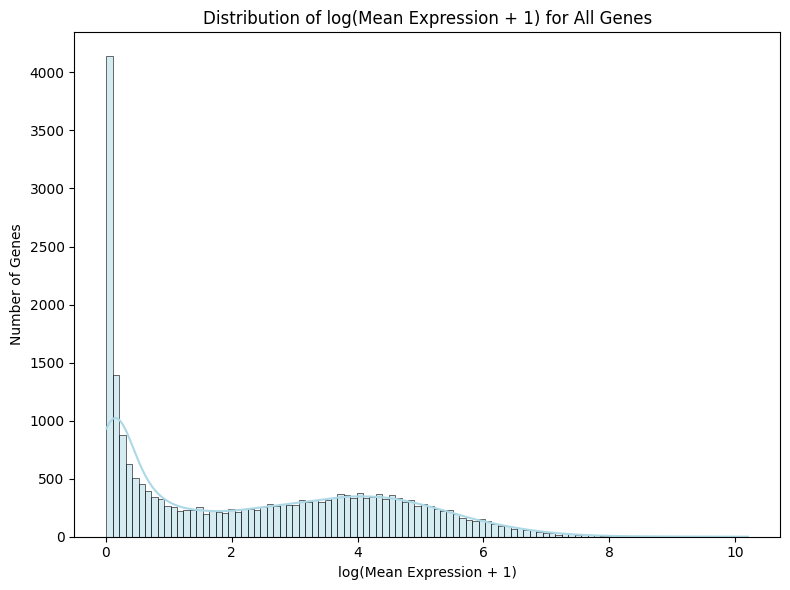

In [45]:
# Create a new column for log(Mean + 1)
gene_stats_hcc['logMean'] = np.log1p(gene_stats_hcc['Mean'])  # log1p(x) = log(x+1)

plt.figure(figsize=(8, 6))
sns.histplot(
    gene_stats_hcc['logMean'],
    bins=100,
    kde=True,
    color='lightblue'
)
plt.xlabel("log(Mean Expression + 1)")
plt.ylabel("Number of Genes")
plt.title("Distribution of log(Mean Expression + 1) for All Genes")
plt.tight_layout()
plt.show()

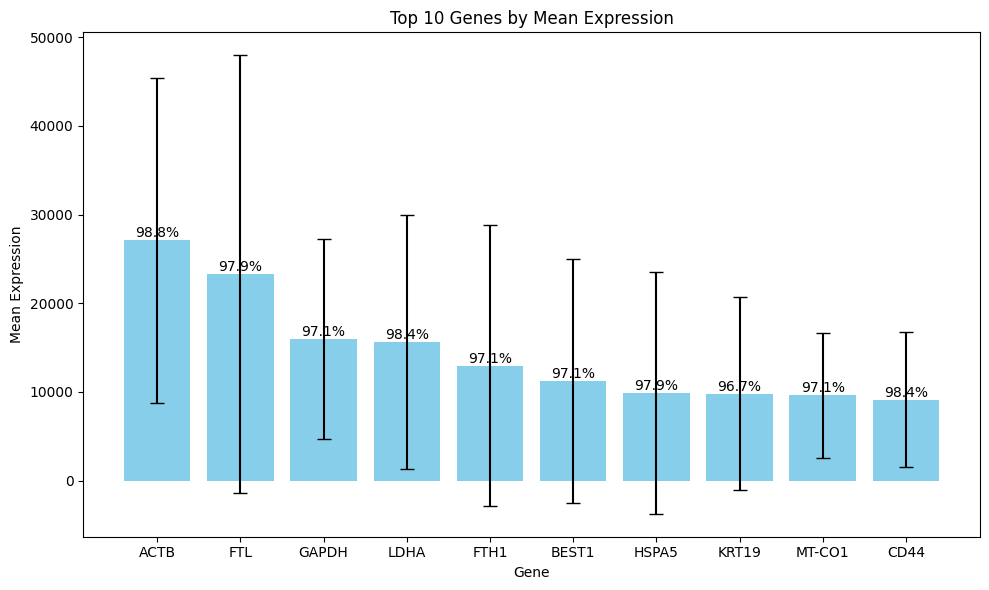

In [46]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

top10_genes_hcc = gene_stats_hcc.sort_values(by='Mean', ascending=False).head(10)

# Create a bar plot for the top 10 genes with error bars (SD)
bars = ax.bar(top10_genes_hcc.index, top10_genes_hcc['Mean'], yerr=top10_genes_hcc['Std'], capsize=5, color='skyblue')

ax.set_ylabel("Mean Expression")
ax.set_xlabel("Gene")
ax.set_title("Top 10 Genes by Mean Expression")

# Annotate each bar with the percentage of cells expressing the gene
for bar, pct in zip(bars, top10_genes_hcc["% Expressing"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\ilafa\AppData\Local\Temp\ipykernel_11380\4020002858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')


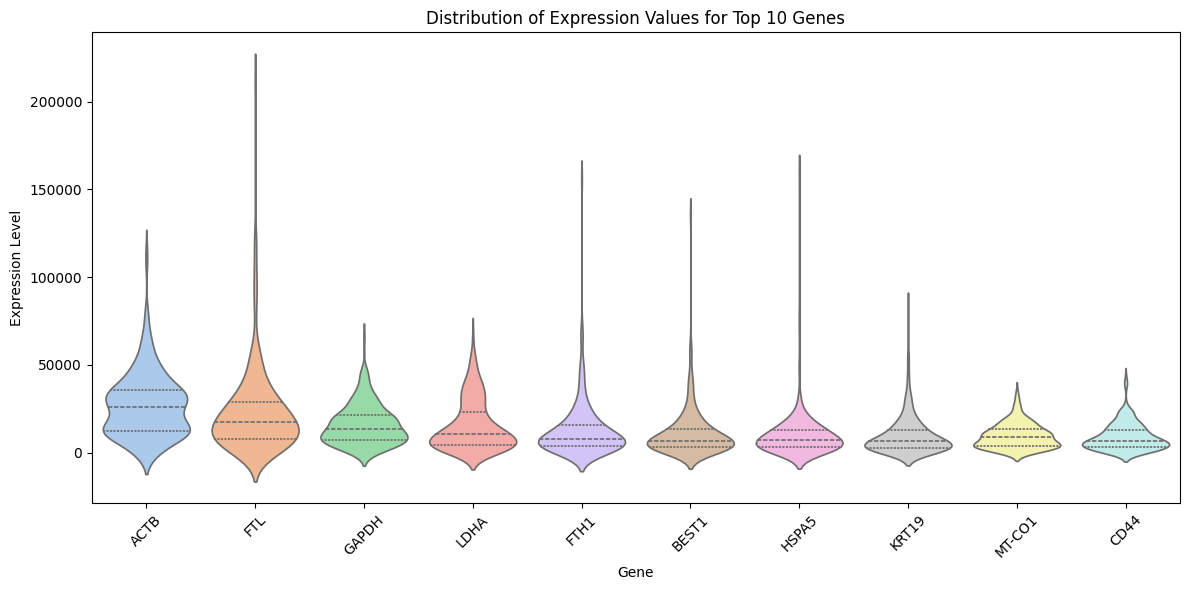

In [47]:
# Subset original data for only the top 10 genes
df_top10 = dfs_hcc_unfiltered.loc[top10_genes_hcc.index]

# Melt the DataFrame so that you have a long-form DataFrame for seaborn
df_melted = df_top10.reset_index().melt(id_vars='index', var_name='Cell', value_name='Expression')
df_melted.rename(columns={'index': 'Gene'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')
plt.title("Distribution of Expression Values for Top 10 Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **2.3** Filtering Data

#### - *QC Metrics*

In [48]:
# Transpose so cells are rows
hcc_cell_df = dfs_hcc_unfiltered.T

# Compute QC metrics for each cell
cell_qc_hcc = pd.DataFrame({
    "total_counts": hcc_cell_df.sum(axis=1),
    "n_genes_by_counts": (hcc_cell_df > 0).sum(axis=1),
    "pct_zero_genes": (hcc_cell_df == 0).sum(axis=1) / dfs_hcc_unfiltered.shape[0] * 100
})

cell_qc_hcc.head()

,total_counts,n_genes_by_counts,pct_zero_genes
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,2329439,10796,53.855360
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,4858841,11251,51.910583
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,226818,9887,57.740639
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,3525520,7597,67.528637
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,835249,10136,56.676355


In [49]:
cell_qc_hcc.describe()

,total_counts,n_genes_by_counts,pct_zero_genes
count,2.430000e+02,243.000000,243.000000
mean,2.012306e+06,10330.358025,55.845623
std,1.171858e+06,2260.259356,9.660879
min,1.140000e+02,35.000000,40.220551
25%,9.910625e+05,10117.000000,51.235254
50%,2.067645e+06,10831.000000,53.705762
75%,2.925182e+06,11409.000000,56.757565
max,5.758132e+06,13986.000000,99.850402


#### - Filtering the data based on total count and % expressed

In [50]:
filtered_cells = cell_qc_hcc[
    (cell_qc_hcc["total_counts"] >= 200000) &
    (cell_qc_hcc["n_genes_by_counts"] >= 8000) &
    (cell_qc_hcc["pct_zero_genes"] <= 70)
]
cells_to_keep = filtered_cells.index
dfs_hcc_f1 = dfs_hcc_unfiltered[cells_to_keep]
print("Filtered DataFrame shape:", dfs_hcc_f1.shape)

Filtered DataFrame shape: (23396, 227)


In [51]:
gene_qc_hcc = pd.DataFrame({
    "total_expression": dfs_hcc_f1.sum(axis=1),
    "n_cells_expressed": (dfs_hcc_f1 > 0).sum(axis=1),
    "pct_cells_expressed": (dfs_hcc_f1 > 0).sum(axis=1) / dfs_hcc_f1.shape[1] * 100
})

gene_qc_hcc.describe()

,total_expression,n_cells_expressed,pct_cells_expressed
count,2.339600e+04,23396.000000,23396.000000
mean,2.037074e+04,104.960335,46.238033
std,9.928471e+04,88.481827,38.978778
min,0.000000e+00,0.000000,0.000000
25%,6.500000e+01,12.000000,5.286344
50%,1.709500e+03,91.000000,40.088106
75%,1.426125e+04,202.000000,88.986784
max,6.350661e+06,227.000000,100.000000


In [52]:
filtered_genes = gene_qc_hcc[
    (gene_qc_hcc["pct_cells_expressed"] >= 2) &
    (gene_qc_hcc["total_expression"] >= 11)
]

genes_to_keep = filtered_genes.index
dfs_hcc_f2 = dfs_hcc_f1.loc[genes_to_keep]
print("Filtered DataFrame shape:", dfs_hcc_f2.shape)
print("Given Filtered DataFrame shape:", dfs_hcc_filtered.shape)

Filtered DataFrame shape: (19539, 227)
Given Filtered DataFrame shape: (19503, 227)


#### - Checking for duplicates

In [53]:
duplicate_rows_hcc = dfs_hcc_f2.duplicated(keep=False)
dfs_hcc_f2[duplicate_rows_hcc]

,output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.sortedByCoord.out.bam,...,output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
PCDHA2,0,0,4,0,2,0,6,0,0,0,...,0,0,6,0,0,37,1,12,0,0
PCDHA4,0,0,4,0,2,0,6,0,0,0,...,0,0,6,0,0,37,1,12,0,0
PCDHA8,0,0,4,0,2,0,6,0,0,0,...,0,0,6,0,0,37,1,12,0,0
PCDHGA2,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA3,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGB3,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA7,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA9,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGB7,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA12,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25


In [54]:
duplicates_grouped_hcc = dfs_hcc_f2.groupby(list(dfs_hcc_f2.columns)).filter(lambda x: len(x) > 1)
# Raggruppa nuovamente per profilo e costruisci le tuple con i nomi dei geni
duplicate_gene_hcc_tuples = [
    tuple(group.index)
    for _, group in duplicates_grouped_hcc.groupby(list(duplicates_grouped_hcc.columns))
]

# Stampa la lista di tuple
print("Duplicate gene tuples:", duplicate_gene_hcc_tuples)

Duplicate gene tuples: [('MIR3074', 'MIR24-1'), ('MIR374B', 'MIR374C'), ('SUGT1P4-STRA6LP', 'STRA6LP'), ('MIR548AA1', 'MIR548D1'), ('PCDHA2', 'PCDHA4', 'PCDHA8'), ('PCDHGA2', 'PCDHGA3', 'PCDHGB3', 'PCDHGA7', 'PCDHGA9', 'PCDHGB7', 'PCDHGA12', 'PCDHGC4'), ('PANDAR', 'LAP3P2')]


### **2.4** Normalization log and Z

In [55]:
# Log1p Transform
dfs_hcc_log = np.log1p(dfs_hcc_f2)

# Print log-transformed data (before Z-score)
print("HCC1806: After Log1p, Before Z-score")
print(dfs_hcc_log.iloc[:10, :10])

# Z-score normalization
dfs_hcc_normalized = pd.DataFrame(
    StandardScaler().fit_transform(dfs_hcc_log.T).T,
    index=dfs_hcc_log.index,
    columns=dfs_hcc_log.columns)

# Print Z-score normalized data
print("HCC1806: After Z-score")
print(dfs_hcc_normalized.iloc[:10, :10])




HCC1806: After Log1p, Before Z-score
          output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam  \
WASH7P                                             0.000000                      
CICP27                                             0.000000                      
DDX11L17                                           0.000000                      
WASH9P                                             0.000000                      
OR4F29                                             1.098612                      
MTND1P23                                           5.525453                      
MTND2P28                                           4.007333                      
MTCO1P12                                           7.462215                      
MTCO2P12                                           1.945910                      
MTATP8P1                                           0.693147                      

          output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sort

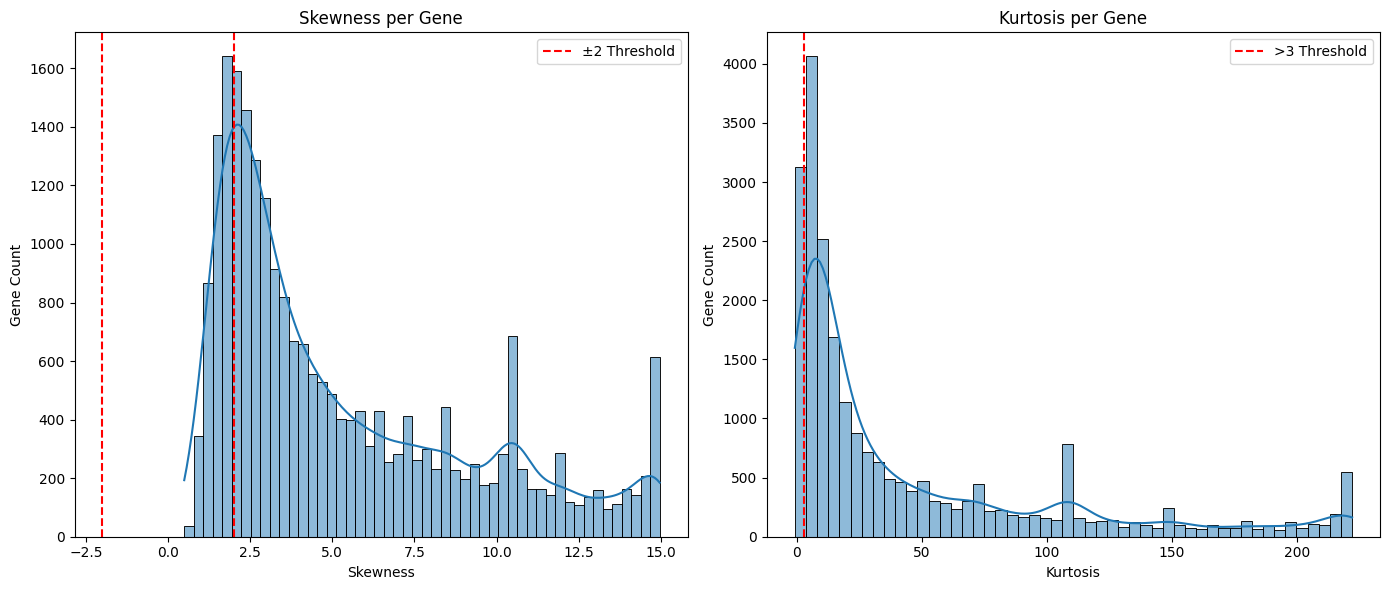

Genes with high skewness (|skew| > 2):
          Skewness   Kurtosis
WASH7P    7.645988  60.989386
CICP27    6.180702  41.577900
DDX11L17  4.015227  18.179532
WASH9P    4.314789  21.510070
OR4F29    4.703500  28.408386
...            ...        ...
MT-TR     2.690587   9.210228
MT-TS2    2.258065   6.403031
MT-TE     5.552083  50.917196
MT-TT     2.507296  10.010172
MT-TP     2.203729   8.170438

[18754 rows x 2 columns]

Genes with high kurtosis (> 3):
          Skewness   Kurtosis
WASH7P    7.645988  60.989386
CICP27    6.180702  41.577900
DDX11L17  4.015227  18.179532
WASH9P    4.314789  21.510070
OR4F29    4.703500  28.408386
...            ...        ...
MT-TS2    2.258065   6.403031
MT-TE     5.552083  50.917196
MT-CYB    1.592522   3.766994
MT-TT     2.507296  10.010172
MT-TP     2.203729   8.170438

[21041 rows x 2 columns]


In [64]:
skewness = dfs_hcc_f1.apply(skew, axis=1)
kurt = dfs_hcc_f1.apply(kurtosis, axis=1)

# Create summary DataFrame
distribution_summary = pd.DataFrame({
    "Skewness": skewness,
    "Kurtosis": kurt
})

# Identify genes with high skewness or kurtosis
high_skew = distribution_summary[abs(distribution_summary["Skewness"]) > 2]
high_kurt = distribution_summary[distribution_summary["Kurtosis"] > 3]

# Plotting
plt.figure(figsize=(14, 6))

# Skewness plot
plt.subplot(1, 2, 1)
sns.histplot(distribution_summary["Skewness"], bins=50, kde=True)
plt.axvline(2, color='red', linestyle='--', label='±2 Threshold')
plt.axvline(-2, color='red', linestyle='--')
plt.title("Skewness per Gene")
plt.xlabel("Skewness")
plt.ylabel("Gene Count")
plt.legend()

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.histplot(distribution_summary["Kurtosis"], bins=50, kde=True)
plt.axvline(3, color='red', linestyle='--', label='>3 Threshold')
plt.title("Kurtosis per Gene")
plt.xlabel("Kurtosis")
plt.ylabel("Gene Count")
plt.legend()

plt.tight_layout()
plt.show()

# Print flagged genes
print("Genes with high skewness (|skew| > 2):")
print(high_skew)

print("\nGenes with high kurtosis (> 3):")
print(high_kurt)

The left panel shows the distribution of skewness across genes. The vast majority of genes display positive skewness, with a sharp peak around values slightly above 2, and a long tail stretching beyond 15. This pattern indicates that gene expression distributions are asymmetric, with many low expression values and few extreme high values, a hallmark of sparse single-cell transcriptomic data. The red dashed lines at ±2 mark the threshold for high skewness, and it's clear that a large number of genes exceed this threshold, particularly on the positive side, suggesting widespread presence of rare expression bursts.

The right panel illustrates the kurtosis distribution per gene. Here, too, the bulk of genes exhibit kurtosis well above the threshold of 3, with values extending far beyond 200. This confirms that the variance in expression is strongly influenced by outliers, which may arise due to biological processes (like transcriptional bursts) or technical factors (such as dropout events). The steep initial peak near 0–10 is followed by a long right tail, consistent with heavy-tailed distributions.

Overall, these plots reveal a typical single-cell RNA-seq pattern: asymmetric and heavy-tailed gene expression distributions, driven by sparsity, noise, and biological variability. Such genes with extreme skewness or kurtosis should be carefully examined, especially when used in downstream modeling or clustering.

### PCA Implementation
Our plan:
1. **Data Centering**: Subtract the mean from the dataset.

2. **Covariance Matrix Calculation**: Compute the covariance matrix of the centered data.

3. **Eigen-decomposition**: Use np.linalg.eig (or SVD) to compute eigenvalues and eigenvectors.

4. **Sorting Components**: Order the eigenvectors by the magnitude of their eigenvalues.

5. **Projection**: Project the original data onto the principal components.

6. **Reconstruction**: Reconstruct the data from the selected components and compute the reconstruction error (e.g., mean squared error).


In [65]:
def pca(X, num_components, standardize=False):
    # Center the data
    # Notice the axis=0 argument to calculate mean along the columns!
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    X_std = None
    if standardize: # standardize each feature to have unit variance
        X_std = np.std(X_centered, axis=0)
        # Avoid division by zero
        X_std[X_std == 0] = 1.0
        X_centered = X_centered / X_std
    
    # Compute covariance matrix
    # Notice the rowvar=False argument to indicate that
    # the columns represent features, and the rows instances
    # we also need to be sure no complex numbers are generated
    cov_matrix = np.cov(X_centered, rowvar=False, dtype=np.float64)

    # Eigen-decomposition
    # WARNING: we use np.linalg.eigh, 
    # that is specific for Hermitian matrices 
    # (in this case, the covariance matrix is symmetric)
    # this function is more stable and efficient for this case
    # and we avoid complex numbers!
    # It is also much more efficient than np.linalg.eig,
    # it returns the eigenvalues in ascending order 
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    # argsort is not really necessary, 
    # because we are using eigh instead of eig, 
    # but it helps for the visualization
    sorted_idx = np.argsort(eigenvalues)[::-1]

    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx] #The first dimension are the eigenvector themself, the second dimension are the respective eigenvalues
    
    # Select 'num_components' principal components
    components = eigenvectors_sorted[:, :num_components]
    
    # Project the data
    X_projected = np.dot(X_centered, components)
    
    # Reconstruct the data from the projection
    X_reconstructed = np.dot(X_projected, components.T) 

    # Reverse standardization if needed
    if standardize:
        X_reconstructed = X_reconstructed * X_std

    # Add the mean back
    X_reconstructed += X_mean

    # Compute reconstruction error (mean squared error)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    
    return {
        "X_mean": X_mean,
        "X_std": X_std,
        "components": components,
        "X_projected": X_projected,
        "X_reconstructed": X_reconstructed,
        "reconstruction_error": reconstruction_error,
        "eigenvalues": eigenvalues_sorted
    } 

for i in range (1,100,10):
    pca_result = pca(dfs_hcc_f1.to_numpy(), num_components= i, standardize=True)
    print("PCA reconstruction error:", pca_result["reconstruction_error"])

PCA reconstruction error: 87201.05124420702
PCA reconstruction error: 22644.90159209905
PCA reconstruction error: 13757.871597363106
PCA reconstruction error: 10206.92886609736
PCA reconstruction error: 8109.667234428593
PCA reconstruction error: 6548.165716201332
PCA reconstruction error: 5453.011367969869
PCA reconstruction error: 4513.38164107404
PCA reconstruction error: 3856.0131763770028
PCA reconstruction error: 3304.2602349103868


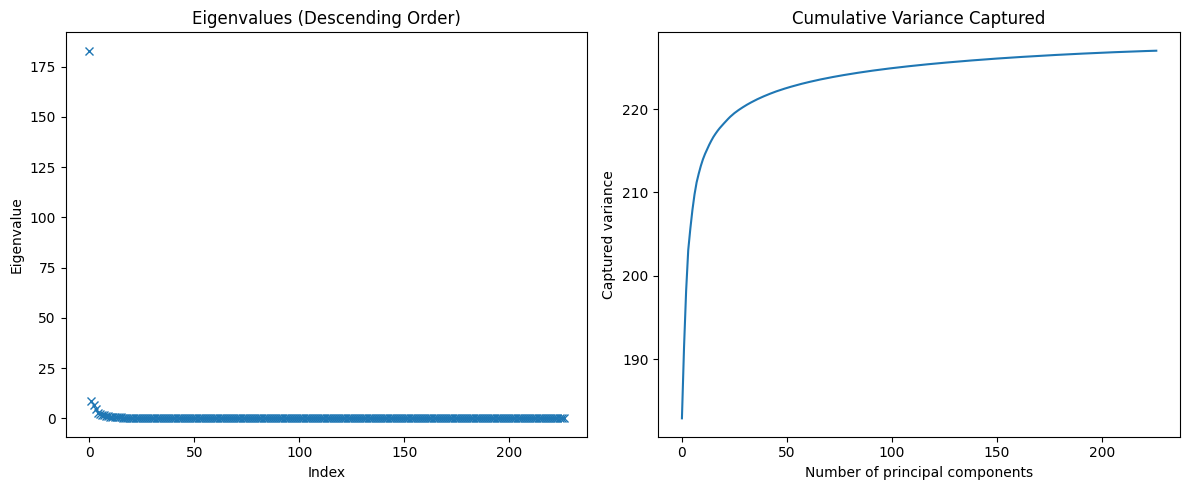

In [66]:
# Use your PCA function once with full decomposition
pca_result_full = pca(dfs_hcc_f1.to_numpy(), num_components=dfs_mcf_f1.shape[1], standardize=True)

# Extract sorted eigenvalues
eigenvalues_sorted = pca_result_full["eigenvalues"]

# (a) Scree plot: eigenvalues in descending order
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eigenvalues_sorted, 'x')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues (Descending Order)")

# (b) Cumulative captured variance
cumulative_variance = np.cumsum(eigenvalues_sorted)
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance)
plt.xlabel("Number of principal components")
plt.ylabel("Captured variance")
plt.title("Cumulative Variance Captured")

plt.tight_layout()
plt.show()
